<a href="https://colab.research.google.com/github/ashikshafi08/Learning-Fastai/blob/main/Underhood_the_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [140]:
 pip install fastai --upgrade

Requirement already up-to-date: fastai in /usr/local/lib/python3.6/dist-packages (2.2.5)


In [141]:
# Certain utils

!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()
from fastbook import *


In [142]:
from fastai import *
from fastai.vision.all import *

# Pixel Similarity 

Find the average pixel value for every pixel of the `3s` then do the same for the `7s` . This will give us two group average's defining what we might call the **ideal** `3` and `7` . 

Then to classify an image as one digit or the another we see which of these two ideal digits the image is most similar to.

In [143]:
# Already done these all before 

path = untar_data(URLs.MNIST_SAMPLE)

threes = (path / 'train' / '3').ls().sorted()
sevens = (path / 'train' / '7').ls().sorted()

len(sevens) , len(threes)

(6265, 6131)

In [144]:
# Stacking all the images in the directory, and converting into tensors

seven_tensor = [tensor(Image.open(o)) for o in sevens]
three_tensor = [tensor(Image.open(o)) for o in threes]


In [145]:
# Checking the shape of the tensor

len(seven_tensor) , len(three_tensor)

(6265, 6131)

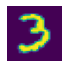

In [146]:
# Printing out a image 

show_image(three_tensor[4]) # Show image is fastai's function

We want to compute the average over all the images of the intensity of the pixel. 

In Pytorch, such as taking a mean require us to cast our integer to types of float. So we gotta cast our stacked tensor to float now.

In [147]:
# Casting our integer type to float 

stacked_sevens = torch.stack(seven_tensor).float() / 255
stacked_threes = torch.stack(three_tensor).float() / 255

stacked_sevens.shape , stacked_threes.shape

(torch.Size([6265, 28, 28]), torch.Size([6131, 28, 28]))

In above the `.shape` tells us that stacked_sevens has 6252 images, each size of *28x28* pixels. 


In [148]:
# Length of tensor's shape is its rank 

len(stacked_threes.shape) , len(stacked_sevens.shape) # both are rank 3 tensors

(3, 3)

In [149]:
# Also using ndim we can get the rank 

stacked_sevens.ndim

3

(<matplotlib.axes._subplots.AxesSubplot at 0x7f200c40ce80>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f200edfa978>)

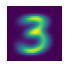

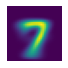

In [150]:
# The Mean 3, which we computed by taking the mean along dimensions 0 of our staced tensor

mean3 = stacked_threes.mean(0) # divided by 0th dimension
mean7 = stacked_sevens.mean(0)

# Display
show_image(mean3) , show_image(mean7)

In [151]:
stacked_threes.mean(0)

tensor([[0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 7.2918e-05, 1.9637e-04, 2.3410e-04, 1.9253e-04, 2.7568e-04, 2.6161e-04,
         2.9423e-04, 2.8400e-04, 1.5671e-04, 4.8612e-05, 5.7567e-06, 0.0000e+00, 0.0000e+

### Trying both L1 and L2 norm

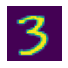

In [152]:
# Sample 3, one img of a stacked three 

a_3 = stacked_threes[1] 
show_image(a_3) # Now gotta calculate this with average 3 we created

In [153]:
# This is the L1 norm or mean of the absolute value of differences

dist_3_abs = (a_3 - mean3).abs().mean() # replace -ve with +ve

# This is the L2 norm, root mean squared error (RMSE)
dist_3_sqrt = ((a_3 - mean3)**2).mean().sqrt()

# Printing both 
print(f'This the distance calculated from mean3 to single 3 using L1 norm: {dist_3_abs}')
print(f'This the distance calculated from mean3 to single 3 using L2 norm: {dist_3_sqrt}')

This the distance calculated from mean3 to single 3 using L1 norm: 0.11143654584884644
This the distance calculated from mean3 to single 3 using L2 norm: 0.20208320021629333


In [154]:
# Calculating the same for 7 

dist_7_abs = (a_3 - mean7).abs().mean()
dist_7_sqrt = ((a_3 - mean7)**2).mean().sqrt()

dist_7_abs , dist_7_sqrt 

(tensor(0.1586), tensor(0.3021))

# From Array's to Pytorch Tensors 

Here we will dig deep into Pytorch itself, unfolding the functionality of Pytorch and tidbits which we can use on fastai to ease our process. 

In [155]:
# Creating a numpy array and pytorch tensor

data = [[1,2,3],[4,5,6]]
arr = array (data)
tns = tensor(data)


print(f'This is the numpy array: {arr} and the type {type(arr)}')
print(f'This is a Pytorch Tensor: {tns} and the type {type(tns)}')

This is the numpy array: [[1 2 3]
 [4 5 6]] and the type <class 'numpy.ndarray'>
This is a Pytorch Tensor: tensor([[1, 2, 3],
        [4, 5, 6]]) and the type <class 'torch.Tensor'>


## Operation on Tensor

In [156]:
# Indexing a tensor 

print(tns[1])
print(tns[0:2])

tensor([4, 5, 6])
tensor([[1, 2, 3],
        [4, 5, 6]])


In [157]:
# Indexing just the coloumn using [: , num]

tns[: , 2] , tns[: , 1]

(tensor([3, 6]), tensor([2, 5]))

In [158]:
# With start and end indexing [start : end ] or slicing

tns[0 , 0:1] , tns[1 , 0:3]

(tensor([1]), tensor([4, 5, 6]))

In [159]:
# Using Standard operations 

print(tns + 1)

print(tns * 4)

tensor([[2, 3, 4],
        [5, 6, 7]])
tensor([[ 4,  8, 12],
        [16, 20, 24]])


In [160]:
# Checking the type of a tensor 

tns.type()

'torch.LongTensor'

## The Idea of Broadcasting and computing with it. 


For now we want to calculate the **metric** over our **validation set.** Well this is because to avoid overfitting. Since we dont have a dedicated valid set here we are going to take a part of our training data and use it for validation set.

Below cells will work on creating a validation set and introduce to the concept of broadcasting. 

In [161]:
# Creating valid 3 and 7 tensors 

valid_3_tens = torch.stack([tensor(Image.open(o)) for o in 
                            (path / 'valid' /'3').ls()])

valid_7_tens = torch.stack([tensor(Image.open(o)) for o in 
                            (path/'valid'/'7').ls()])

# Putitng them into 0 and 1 

valid_3_tens = valid_3_tens.float() / 255
valid_7_tens = valid_7_tens.float() / 255


print(f'The shape of valid 3 tensor{valid_3_tens.shape}')
print(f'The shape of valid 7 tensor{valid_7_tens.shape}')

The shape of valid 3 tensortorch.Size([1010, 28, 28])
The shape of valid 7 tensortorch.Size([1028, 28, 28])


Now having those validation set, we gotta write a function kinda `is_3` that will decide if an arbitrary image is 3 or 7. It will decide by which of these two **ideal digits (3 or 7)** closer to the arbitrary value. 

For that we need to define a notion of distance, which means a function which calculates distance between two images. 


I raised a thread why we use `(-1,-2)` with the mean. Here it got answered 

https://forums.fast.ai/t/understanding-mean-1-2-in-mnist-distance/84430/4

In [162]:
# Writing the function which cal dist btw ideal and arbitrary value

def mnist_distance(a, b):
  return (a-b).abs().mean((-1 , -2))

# Passing in ideal and arbitrary 

mnist_distance(a_3 , mean3)

tensor(0.1114)

#### Decoding mnist_distance for understanding

In [163]:
ab = (a_3 - mean3).abs()
print(ab[:2])

tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])


In [164]:
ab.mean()

tensor(0.1114)

In [165]:
ab.mean((-1 , -2))

tensor(0.1114)


#### With the power of Broadcasting calculating for all tensors in the validation set. 

In [166]:
valid_3_dist = mnist_distance(valid_3_tens , mean3)


print(f'The shape of distance calculated : {valid_3_dist.shape}')

The shape of distance calculated : torch.Size([1010])


In [167]:
# It has every distance for 1011 images, and stacked into a tensor.

valid_3_dist

tensor([0.1498, 0.1317, 0.1242,  ..., 0.1273, 0.1611, 0.1150])

In [168]:
# After broadcasting the two argument tensors have the same rank. 

test_rank = tensor([1,2,4]) + tensor([1,24,5] , 
                         [1,234,2])

test_rank.ndim # Before it was 1 and 2 now after broadcasting became 2

2

In [169]:
valid_3_tens.shape , a_3.shape # It will broadcast to the large rank

(torch.Size([1010, 28, 28]), torch.Size([28, 28]))

In [170]:
# Talking about axes 

valid_3_tens.ndim

3

By using `mnist_distance` we can figure out wheter an image is a 3 by using the following logic: 

* If the distance between digit in question and ideal `3` is less than the distance to the ideal `7`, then its a `3`. 

The below function will automatically use broadcasting. 

In [171]:
mean3.ndim , mean3.shape

(2, torch.Size([28, 28]))

In [172]:
## Function to check whether its 3 or not 

def is_3(x):
  return mnist_distance(x , mean3) < mnist_distance(x , mean7)

In [173]:
# Testing the function we made above 

is_3(valid_3_tens[0]) , is_3(a_3).float() # True means its a 3

(tensor(True), tensor(1.))

In [174]:
# Testing 7 

a_7 = stacked_sevens[3]

is_3(a_7) , is_3(a_7).float() # If its false then it means a 7

(tensor(False), tensor(0.))

In [175]:
# Decoding the above function, ima idiot was checking with a_7 shit

mnist_distance(a_3 , mean3) , mnist_distance(a_3 , mean7)

(tensor(0.1114), tensor(0.1586))

In [176]:
mnist_distance(a_3 , mean3) <  mnist_distance(a_3 , mean7)

tensor(True)

**By Broadcasting, testing our `is_3` function on the whole sets**

In [177]:
is_3(valid_3_tens) # We will get a list of boolean

tensor([True, True, True,  ..., True, True, True])

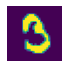

In [178]:
# The reason for false, our model couldnt infer it properly

show_image(valid_3_tens[0])

### Calculating Accuracy 

Here we are calculating accuracy, for each of the `3s` and `7s` by taking the average of that function. For all the `3s` and inverse for all the `7s`.

This will be how accurate our function `is_3()` able to detect whether its 3 or 7.  

In [179]:
# For 3
accuracy_3s = is_3(valid_3_tens).float().mean() # We use mean to take average

# For 7, will take inverse of all the 7s 
accuracy_7s = (1 - is_3(valid_7_tens).float().mean())

In [180]:
print(f'The accuracy of all the 3s: {accuracy_3s}')  
print(f'The accuracy of all the 7s: {accuracy_7s}')
print(f'On combined how much our is_3() able to detect accurately: {(accuracy_3s + accuracy_7s) / 2}')

The accuracy of all the 3s: 0.9168316721916199
The accuracy of all the 7s: 0.9854085445404053
On combined how much our is_3() able to detect accurately: 0.951120138168335


# Stochastic Gradient Descent (SGD)

This is something which will allows our model to get better and better which can learn. In pixel similarity approach we don't have,

- any kind of weight assignment
- any way of improving based on testing the effectiveness of a weight assignment.

In a nut shell we can't improve our pixel similarity approach by modifying a set of parameters.

In [181]:
# Representing 3 in a df 


im3_path = threes[1]
im3 = Image.open(im3_path)
im3_t = tensor(im3)
df = pd.DataFrame(im3_t)
df.style.set_properties(**{'font_size':'6pt'}).background_gradient('Greys')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,29,150,195,254,255,254,176,193,150,96,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,48,166,224,253,253,234,196,253,253,253,253,233,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,93,244,249,253,187,46,10,8,4,10,194,253,253,233,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,107,253,253,230,48,0,0,0,0,0,192,253,253,156,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,3,20,20,15,0,0,0,0,0,43,224,253,245,74,0,0,0,0,0,0,0,0,0


In [182]:
# Representing 7 in a df 


im7_path = sevens[2]
im7 = Image.open(im7_path)
im7_t = tensor(im7)
df = pd.DataFrame(im7_t)
df.style.set_properties(**{'font_size':'6pt'}).background_gradient('Greys')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,13,135,147,147,147,147,147,147,122,39,2,0,0,0,0,0,0,0,0
7,0,0,0,0,0,93,185,185,185,207,254,254,254,254,254,254,254,254,254,43,0,0,0,0,0,0,0,0
8,0,0,0,0,0,253,254,254,254,253,198,140,140,140,140,140,196,253,254,119,0,0,0,0,0,0,0,0
9,0,0,0,0,0,128,254,233,103,70,0,0,0,0,0,0,4,183,254,101,0,0,0,0,0,0,0,0


Instead we could look at each individual pixel and come up with a set of weights for each, such that the highest weights are associated with those pixels most likely to be black for a particular category.

For instance, pixel toward the bottom right are not very likely to be activated for a 7, so 7 will have a low weight. But they are activated for 8, so now 8 would have high weight.

In [183]:
# Probability of number being 8 

def pr_eight(x , w):
  '''
  x --> input image
  w --> weights
  '''
  return (x*w).sum()

### Sequence of steps

- **Initialize**

    We initialize the parameters (or) weights to random values at first. It's believed starting with random weights (or) values works perfectly well. 

- **Loss**

    A function will return a number that is small when the performance of the model is good. The standard approach is to treat a **small loss as a god and large loss as bad.** 

- **Step**

    A simple way to figure out whether a weight should be increased a bit or decreased, would be just try to increase the weight by a small amount and observe the loss goes up or down. We do this increment and decrement until we find an amount that satisfy us. 

    However, we use calculus to take care of this. Finding which direction and roughly how much, to change each weight without doing those adjustments above. 

    We do this by calculating ***gradients.*** This is just an **performance optimization.** 

- **Stop**

    This is the phase where we choose the epochs to train the model for, we would keep training until the accuracy of the model started getting worse or ran out of time. 

    Before jumping into the whole method, will focus on applying them on simple steps for our digit classifier.


Creating a simple quadratic function, pretending this as our loss function 
`x` --> weight param 

In [184]:
# simple loss function 

def f(x):
  return x**2

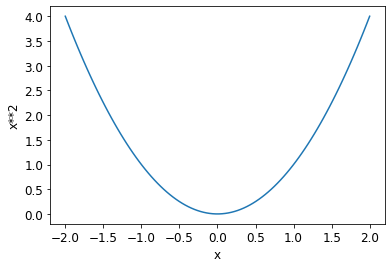

In [185]:
# plotting the graph of the function

plot_function(f , 'x' , 'x**2')

Now the next step would be as per the steps or guide we described, 

- Pick a random value from that graph
- Calculate loss for that value

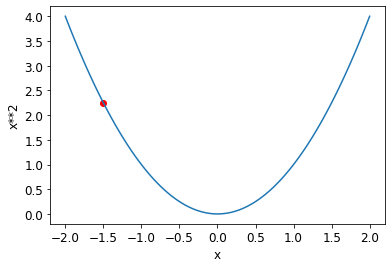

In [186]:
# Picking up a random value 

plot_function(f , 'x' , 'x**2')
plt.scatter(-1.5 , f(-1.5), color='red');

Now we will observe what would happen if we increase or decrease our parameters (or values) by adjusting them towards the slope at a particular point. 
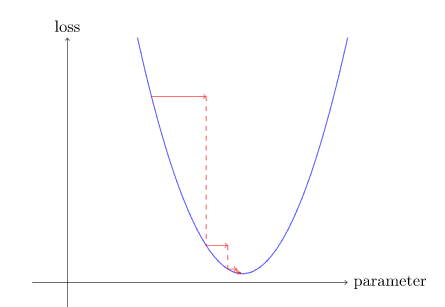

## The Magic Step - Calculating Gradients

As mentioned above we use **calculus** as a performance optimization, it will help us quickly to calculate whether our loss will go up or down when we adjust the parameters up or down. 

In simple words **gradients will tell us how much we have to change each weight to make our model better.** 

**What is derivative?**

For any quadratic function we can calculate its derivatives. The derivative is another function, it calculates the change rather than the value. 

For instance, the derivative of the quad function at the value 3 tells us how rapidly the function changes at the value 3. 

More appropriate definition would be, 

Gradient is defined as rise/run that is the change in the value of the function, divided by the change in the value of the parameter. 

The idea here is when we know how our function will change, we know what we need to do to make it smaller. 

The key in ML is having a way to change the parameter of a function to make it smaller.

#### **Calculating Gradients with Pytorch** 

In [187]:
import torch

In [188]:
# A tensor, in this value we need gradients 

xt = tensor(3.).requires_grad_()

In [189]:
# making calculating with that value (xt)

yt = f(xt) # x**2 --> 2x --> 2(xt) --> 2(3) --> 6 (gradient)
yt

tensor(9., grad_fn=<PowBackward0>)

In [190]:
# Telling Pytorch to calculate gradients for us 

yt.backward()  # refers to backpropagation

In [191]:
# Viewing the gradients 

xt.grad

tensor(6.)

In [192]:
# Same steps but with an Vector Argument 

xt = tensor([3. , 4. , 5.]).requires_grad_()
xt

tensor([3., 4., 5.], requires_grad=True)

In [193]:
# Adding sum to the function --> so it can return a scalar 

def f(x):
  return (x**2).sum()

yt = f(xt) 

In [194]:
# Gradients --> 2*xt for every value it applies and sums up

yt.backward()
xt.grad

tensor([ 6.,  8., 10.])

The gradients will tell us only the slope of our function, they don't tell us exactly how far to adjust the parameters. 

If slope is very large —> More adjustments to do 

If slope is very small —> we are close to the optimal value.

### Stepping with a Learning Rate

All approach start with a basic idea of multiplying the gradient by a small number called the *learning rate.*

The learning rate is often a number between `0.001` and `0.1`, people find their best learning rate by trying out few of them. But in Fastai by using a learning rate finder will handle all this hustle once for all.

Once we picked the lr, we can adjust the parameters by this simple function, 

`w - = w.grad * lr` —> known as *stepping* the parameters 

**Complications on picking a learning rate**
- If the learning rate is too low, optimization will take a lot of time because steps towards the minimum of the loss function are tiny.
- If the learning rate is too high, it can result in getting the *loss* worse. Rather than diverging (or) converging it will bounce around

[Estimating an Optimal Learning Rate For a Deep Neural Network](https://towardsdatascience.com/estimating-optimal-learning-rate-for-a-deep-neural-network-ce32f2556ce0)

The above Article explains the concept of Learning rate well and clear!

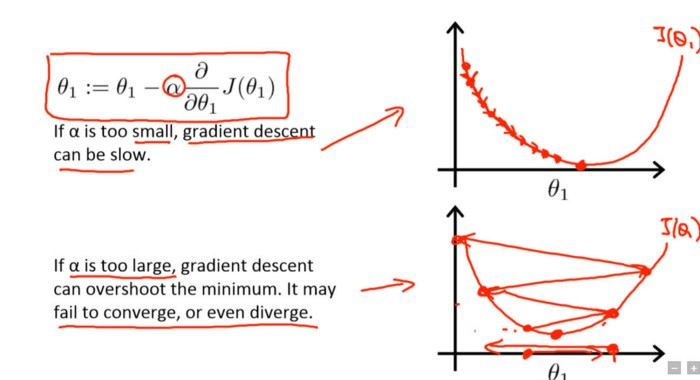

## An End - to - End SGD Example

As it went up the hell it would be slowest at the top and it would then speed up as it goes downhill. Want to build a model of how the speed changes over time in a roller coster.

If we measure the speed manually for every 20 seconds, it might look like this. 

In [195]:
# Time 

time = torch.arange(0,20).float()
time # Time in seconds

tensor([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13., 14., 15., 16., 17., 18., 19.])

In [196]:
# Calculating speed 

speed = torch.randn(20)*3 + 0.75*(time -9.5)**2 + 1

speed # The speed calculated for every sec interval for 20 seconds 

tensor([70.4569, 54.7755, 38.1953, 30.6521, 26.5142, 19.3517,  9.2660,  6.6148,  4.6717,  1.0886,  0.7677,  5.7649,  2.1755, 15.9695, 14.6758, 19.8960, 34.9541, 42.7484, 54.9046, 69.5772])

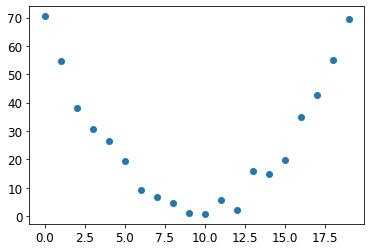

In [197]:
# Plotting time and speed 

plt.scatter(time , speed)

Now we gotta distinguish between the function's input and its parameters, so we collect the parameters in one argument `(a , b , c)` and input `(t)` in separate argument.

In [198]:
def f(t , params):
  a ,b, c = params
  return a*(t**2) + (b*t) + c

`a*(t**2) + (b*t) + c` —> Since we are constructing a function to make prediction, the target function was the actual speed, 

 `speed` —> `torch.randn(20)*3 + 0.75*(time -9.5)**2 + 1`

We can't consider every possible function, by guessing the form of the function (`speed`) we are using `a*(t**2) + (b*t) + c` as a function for **prediction**.

In simple words we have restricted the problem of finding the best function that fits the data to find the best quadratic function (`speed`). 

Every quad function has only 3 params `(a , b , c)` so its enough to find only the best values for `(a , b , c)`. 

To define the term **best values —>** we define this precisely by choosing a loss function. Which returns a value based on preds and targets, where if the value is lower we consider that as **better** prediction.

In [199]:
# Loss function 

def mse(preds , targets):
  return ((preds - targets)**2).mean()

In [200]:
# Intialize the parameters 

params = torch.randn(3).requires_grad_()
params

tensor([ 1.9983,  1.0384, -0.5449], requires_grad=True)

In [201]:
# Calculating the predictions 

preds = f(time , params) # Pred function
preds

tensor([-5.4486e-01,  2.4918e+00,  9.5251e+00,  2.0555e+01,  3.5581e+01,  5.4604e+01,  7.7624e+01,  1.0464e+02,  1.3565e+02,  1.7066e+02,  2.0967e+02,  2.5267e+02,  2.9967e+02,  3.5066e+02,
         4.0566e+02,  4.6464e+02,  5.2763e+02,  5.9461e+02,  6.6559e+02,  7.4056e+02], grad_fn=<AddBackward0>)

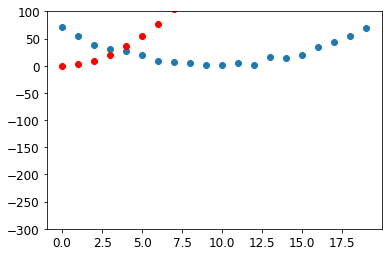

In [202]:
# A function to plot both targets and preds to see how close our predictins are

def show_preds(preds , ax=None):
  if ax is None: ax=plt.subplots()[1]
  ax.scatter(time , speed)
  ax.scatter(time , to_np(preds) , color='red')
  ax.set_ylim(-300 , 100)

show_preds(preds)

In [203]:
# Calculate the loss 

loss = mse(preds , speed)
loss

tensor(104822.4062, grad_fn=<MeanBackward0>)

In [204]:
# Calculating the gradients 

loss.backward()
params.grad


tensor([108272.0703,   6961.9341,    459.9134])

In [205]:
# Multiplying by a learning rate 
params.grad * 1e-5

tensor([1.0827, 0.0696, 0.0046])

In [206]:
# Updating or Stepping the weight with a learning rate 

lr = 1e-5 # Learning rate 
params.data -= lr * params.grad.data
params.grad = None

In [207]:

#params.grad.data , params.grad
params.data # Is the random value generated (a,b,c) intialized parameters 

tensor([ 0.9156,  0.9688, -0.5495])

In [208]:
# Seeing if loss has improved 

preds = f(time , params)
mse(preds , speed)

tensor(20361.3633, grad_fn=<MeanBackward0>)

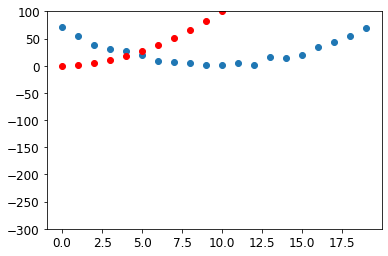

In [209]:
# Plotting 
show_preds(preds)

In [210]:
# Putting everything into one function, to apply them in one step 

def apply_step(params , prn=True):
  preds = f(time , params)
  loss = mse(preds , speed)
  loss.backward()
  params.data -= lr * params.grad.data
  params.grad = None
  if prn:
    print(loss.item()) # Getting only a number rather a tensor
  return preds

In [211]:
# Repeating the process, using loop 

for i in range(10):
  apply_step(params)

20361.36328125
4378.7509765625
1354.348388671875
782.0355224609375
673.7330322265625
653.2354125976562
649.3531494140625
648.6151123046875
648.471923828125
648.4413452148438


Finally we are dumping all those seven steps into one whole function for reproducibility. Now this can be used without writing every line of codes again. By initiating  a loop to this function we can gradually decrease the loss. 

Looking at each of these loss numbers disguises the fact that each iteration represents an entirely different quadratic function being tried, on the way to finding the best possible quad function. 

So we are visualizing them instead!

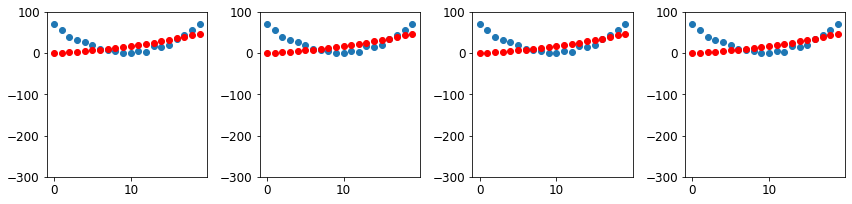

In [212]:
# Visualzing the loss numbers 

_ , axs = plt.subplots(1 , 4 , figsize=(12 , 3))
for ax in axs:
  show_preds(apply_step(params , False), ax)
  plt.tight_layout()

## Summarizing Gradient Descent

- At beginning, the weights of our model can be random (or) from pre-trained model.
- We compare the model with our targets and prediction using a **loss function,** which returns a number that we want to make as low as possible by **improving our weights.**
- To find how to change the **weights** to make the loss a bit better, we use calculus to **calculate the gradients.**
- Calculating gradients is similar finding a steepest downward slope, we use the **magnitude of the gradient** (steepness of a slope) to tell us how big a step to take.
- To decide on the step size, we multiply the gradient by a number we choose called the **learning rate.**
- We then iterate until we have reached the lower point, and then stop.

# The MNIST Loss Function

In [213]:
# Changing them from a list of matrices (rank 3) to a list of vectors (rank 2)

train_x = torch.cat([stacked_threes , stacked_sevens]).view(-1 , 28*28)

train_x.shape 

torch.Size([12396, 784])

In [214]:
# Before converting them, it was a matrice
torch.cat([stacked_threes , stacked_sevens]).shape

torch.Size([12396, 28, 28])

`-1` —> denotes the row, since we don't know how many rows exactly in a dataset (or) this image, we use -1. Which says make this axis as big as necessary to fit all the data. Like we do in slicing!

For labels, will use

*   **1** for `3s`
*   **0** for `7s`



In [215]:
# Constructing our labels 

train_y = tensor([1] * len(threes) + [0] * len(sevens)).unsqueeze(1)
train_y.shape

torch.Size([12396, 1])

In [216]:
# It was a vector before, changing into matrix by unsqueeze

tensor([1] * len(threes) + [0] * len(sevens)).shape

torch.Size([12396])

Now we have our `train_x` and `train_y` the next thing to do is to put them in a **Dataset**. 

A Dataset in Pytorch is required to return a tuple of (x,y) when indexed. 

In [217]:
# Zipping x and y into a dataset 

dset = list(zip(train_x , train_y))
x , y = dset[0]

# Checking the shape 
x.shape , y.shape

(torch.Size([784]), torch.Size([1]))

In [218]:
# x and y 

print(f'Images in Tensor (sliced) : {x[0 : 100]}')
print('----------------- ------------ --------- -------')
print(f'Labels: {y}')


Images in Tensor (sliced) : tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
----------------- ------------ --------- -------
Labels: tensor([1])


In [219]:
# Doing the exact thing for our validation set 

valid_x = torch.cat([valid_3_tens , valid_7_tens]).view(-1 , 28*28)
valid_y = tensor([1]*len(valid_3_tens) + [0]*len(valid_7_tens)).unsqueeze(1)

# Putting them into a dataset 
valid_dset = list(zip(valid_x , valid_y))


First step of the seven step process, 

#### **Initialize the parameters with random values**

In [220]:
# Generates weight for every pixel

def init_params(size , std=1.0):
  '''
  size --> the exact size or shape we want our random values to be
  std --> standard deviation (I guess not sure)
  '''
  return (torch.randn(size) * std).requires_grad_()

# Using the function we created,

weights = init_params((28*28 , 1)) # we argumented the size of (28*28 , 1) --> (784 , 1)

The function `**weight * pixels`** won't be just enough, because image the scenario when our `pixels` are **0.** When we **multiply** our weights with a **pixel of value 0,** then the weight turns out to be **0** as well. 

To overcome this we use something called **bias** (b), looking at this formula `y = wx + b` w and x would be our weight and pixels when those turns out to be **zero.** The bias (b) would be come in rescue. 

`bias = init_params(1)` —> we initialize it constants.

Together the `weights` and `biases` make up the parameters.

In [221]:
# Initializing bias 

bias = init_params(1)

The next step would be, calculating gradients. 

Before let's calculate prediction for one image 

In [222]:
(train_x[0] * weights.T).sum() + bias

tensor([14.6812], grad_fn=<AddBackward0>)

#### **Calculating the predictions**

The next step would be calculate the gradients with the parameters we derived. 

But let's first calculate the predictions manually before getting the help of **gradients**. 

Likewise, we gotta calculate this for every row in the matrix, which is `w * x`. For loop would be slow, we use **matrix multiplication** here to speed up the process.

In Python, matrix multiplication is represented with a `@` operator.

In [223]:
# Constructing the matrix multi function, which does the calculation y = wx + b

def linear1(xb):
  '''
  xb --> input a training set(x)
  '''
  return xb@weights + bias

# Getting the predictions for all images
preds = linear1(train_x)

# Checking what's in 
preds

tensor([[14.6812],
        [10.3846],
        [16.3081],
        ...,
        [-3.9154],
        [ 5.0532],
        [-5.8987]], grad_fn=<AddBackward0>)

In [224]:
# Checking accuracy

corrects = (preds > 0.0).float() == train_y
corrects

# Cutting out the list of  boolean, shrinking them into one single value 
corrects.float().mean().item() # item -> returns a number, excluding the tensor

0.6672313809394836

In [225]:
# Manually tweaking weight by a small value 

weights[0] *=1.001

In [226]:
# After a small change tryna calculate the preds again, Will see how far it has been improved

preds = linear1(train_x)
((preds > 0.0).float() == train_y).float().mean().item()

0.6672313809394836

Tried manually tweaking one value of **weight** with a hope that it would make a difference in the predictions. But it doesn't 

So we need gradients in order to improve our model using SGD, and to calculate gradients we need a ***loss function*** that represents how good our model is. 

Gradients are a measure of how that loss function changes with small tweaks to the weights.

#### **Calculating the loss**

We gotta choose a loss function, which would calculate our predictions for each image, collect these values to calculate an overall accuracy and then calculate the gradients of each weight with respect to that overall accuracy. 

Since gradient of a function is its slope, that is how much the value of the function (slope) goes up or down, divided by how much we changed the input. 

Mean the change in gradients depends on the input we divide by. This brings us a technical problem here but before that we can write mathematically the calculation of gradient, 

`(y_new - y_old) / (x_new - x_old)`

At times when  `x_new` is very similar to `x_old` then their differences will be very small. The change in accuracy happens only when the prediction changes from 3 to a 7, vice versa. 

The problem is that a small change in weights from `x_old` to `x_new` is not likely to cause any change in the prediction. With that being said, `(y_new - y_old)` will almost always will be **0.** 

For instance, (1 - 1) —> will be 0.

A very small change in the value of a weight will often not change the accuracy

Which means it's not useful to use accuracy as a loss function, if we then most of our time our gradient will be 0 and model will not be able to learn well.

**We need a loss function that when our weights result in slightly better predictions, gives us a slightly better loss.**

For instance, if the correct answer is a 3, the score is little higher or if the correct answer is a 7, the score is little lower.

The loss function receives not the image but the predictions `prds` from the model whether its a 3 or not (0 or 1). Then another argument `trgts` with the value 0 to 1.

In [227]:
# Making fake data

trgts = tensor([1 , 0 , 1])
prds = tensor([0.9 , 0.4 , 0.2])

# Construction of loss function 
def mnist_loss(predictions , targets):
  return torch.where(targets==1 , 1-predictions , predictions).mean()

In [228]:
# Since we need a scalar we take a mean, below list are predictions.

torch.where(trgts == 1 , 1- prds , prds)

tensor([0.1000, 0.4000, 0.8000])

In [229]:
# when taking mean
mnist_loss(prds , trgts)

tensor(0.4333)

In [230]:
# Modifying the prediction from 0.2 to 0.8, which means better prediction and checking the calculation
# Now the loss will go down 

prds = tensor([0.9 , 0.4 , 0.8])
mnist_loss(prds , trgts)

tensor(0.2333)

`mnist_distance` has a problem that it assumes that predictions are always between 0 and 1. We need a function which could put different values between 0 and 1.

### Sigmoid Function

The sigmoid function always outputs a number between 0 and 1. 

`def sigmoid(x): return 1 / (1 + torch.exp(-x) )`

But in Pytorch, we have a function which could do this for us. And this is an important function in deep learning, since we often want to ensure that values between 0 and 1.

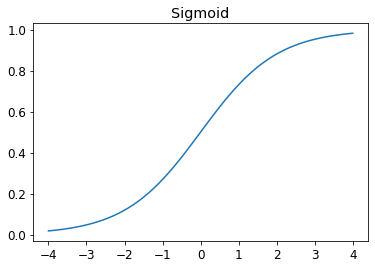

In [231]:
# Example of sigmoid from Pytorch function

plot_function(torch.sigmoid , title='Sigmoid' , min=-4 , max=4)

We can see that it takes any input value, positive or negative, smooshes it into an output value between 0 and 1. 

In [232]:
# Updating mnist_loss function with the sigmoid function 

def mnist_loss(predictions , targets):
  predictions = predictions.sigmoid()
  return torch.where(targets == 1, 1-predictions , predictions).mean()

Now our loss function will work even if the predictions are not between 0 and 1. 

* `metric` --> drive human understanding (for humans)
* `loss`  --> drive automated learning (for automatic updation)

The loss function is calculated for **each item in our dataset**,  and then at the end of an epoch, the **loss values are all averaged and the overall mean is reported for the epoch.** 

Metrics on other hand are the numbers we care about and these are the values which are printed at end of each epoch that tells us how our model is doing. 

When judging a performance of a model it's important to focus on metrics rather than the loss.

## SGD and Mini - Batches

As we recreating those seven steps one by one for our Mnist data, now we have our loss function which is suitable for driving SGD. 

The next phase would be update the weights based on the gradients. This is called an **optimization step**

To take an **optimization step** we need to calculate loss over one or more data items. The two ways we could calculate are: 

- Calculate for the whole dataset.
- Calculate for single data item (one by one).

Either of those above options won't be ideal, that would produce an unstable gradient and it will cause a trouble on updating the gradients. After all this would be slow, imagine doing this for dataset which has million's of images. 

The fix, 

Instead we calculate the average loss for a few data items at a time. This is called **mini - batch**  and the number of data in mini batch is called the **batch size.** 

Larger batch size —> more accurate and stable estimate of the dataset's gradient and loss function. But takes time since we will process fewer mini-batches per epoch. 

Choosing a good batch size is one of the decisions one need to make a deep learning practitioner to train the model quickly and accurately.

Another good reason for using mini-batches, these **calculations** of batches takes place on **GPU**. These accelerator (GPU) perform well only if they have lots of work to do at a time, so it's helpful if we can give them lots of data. 

A effective way is, putting our data on random shuffle on every epoch, before we create mini-batches. Below article **will explain the need for shuffling before creating mini batch.** 

[Why should we shuffle data while training a neural network?](https://stats.stackexchange.com/questions/245502/why-should-we-shuffle-data-while-training-a-neural-network)

The reasons would be: 

- it prevents any bias during the training
- it prevents the model from learning the order of the training
- it helps the training converge fast


Pytorch and Fastai provides `class` that will do the shuffling and mini-batch collation, called **`DataLoader`**

A DataLoader can take any Python collection and turn it into iterator over many batches.


In [233]:
# Using the DataLoader, to shuffle and collate (combine) into mini-batches. 

coll = range(15)
dl = DataLoader(coll , batch_size=5 , shuffle=True) # putting 15 numbers into bs of 5 and shuffled. 
list(dl)

[tensor([ 1,  8, 13,  4,  3]),
 tensor([14,  5, 11,  6,  9]),
 tensor([10,  0,  7,  2, 12])]

But for training a model, we don't just want any Python collection, but a collection containing **Independent** and **dependent** variables (inputs and targets of model). 

A collection that contains tuples of Independent and dependent variables is known in Pytorch as a `Dataset` .

In [234]:
# Example of a dataset 

ds = L(enumerate(string.ascii_lowercase))
ds #  looking inside the dataset

(#26) [(0, 'a'),(1, 'b'),(2, 'c'),(3, 'd'),(4, 'e'),(5, 'f'),(6, 'g'),(7, 'h'),(8, 'i'),(9, 'j')...]

When we pass a `Dataset` to a `DataLoader` we will get back many batches that are themselves tuples of tensors representing batches of independent and dependent variables. 

Instead of `coll` in previous example we could pass `ds` which is a dataset to a `DataLoader`

In [235]:
dl = DataLoader(ds , batch_size=6 , shuffle=True)
list(dl)

[(tensor([ 0, 15,  8, 11, 22, 19]), ('a', 'p', 'i', 'l', 'w', 't')),
 (tensor([ 7,  6,  2,  1, 10,  5]), ('h', 'g', 'c', 'b', 'k', 'f')),
 (tensor([25,  3,  9, 18, 14, 20]), ('z', 'd', 'j', 's', 'o', 'u')),
 (tensor([13, 16, 24, 21, 17, 23]), ('n', 'q', 'y', 'v', 'r', 'x')),
 (tensor([ 4, 12]), ('e', 'm'))]

As we observe those tuples, the `DataLoader` structure those in such a way that both `x` and `y` values will be equally parted. The rest remaining tuples for example above, 

`(tensor([25, 21]), ('z', 'v'))]` 

those are tuples which couldn't form a (**6 , 6)** pair with other tuples. These pair's later equally distributed.


# Putting it All Together

Now we experimented all those seven steps one by one, its time to implement as per the figure. 

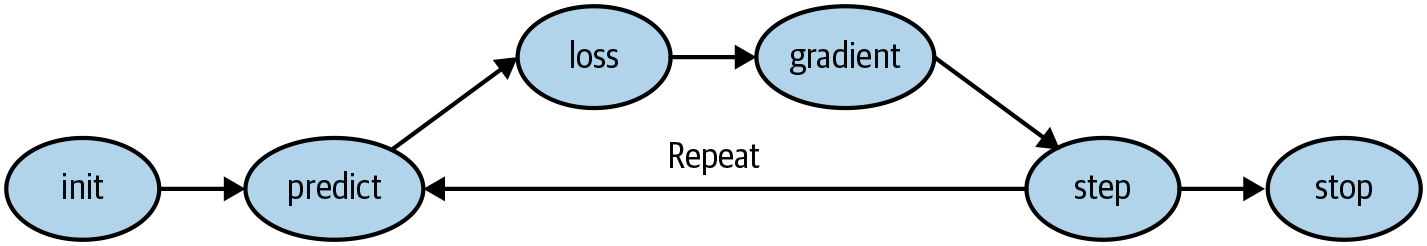

Our code will be implemented as below 

```
for x , y in dl:
  pred = model(x)
  loss = loss_func(pred , y)
  loss.backward()
  parameters -= parameters.grad * lr

```





**Re-initializing the parameters** 

In [236]:
weights = init_params((28*28 , 1))
bias = init_params(1)

**Creating Dataloader** 

A DataLoader can be created from a Dataset 

In [237]:
# DataLoader

dl = DataLoader(dset , batch_size=256)
xb , yb = first(dl) # a keyword to pick first batch

# Checking the shape 
xb.shape , yb.shape

(torch.Size([256, 784]), torch.Size([256, 1]))

In [238]:
# Doing the same for validation set 

valid_dl = DataLoader(valid_dset , batch_size=256)

**Testing with dummy example** 

In [239]:
# Creating mini_batch of size 4

batch = train_x[:4]
batch.shape

torch.Size([4, 784])

In [240]:
# Checking preds by inputing a mini- training set into linear1 model 
preds = linear1(batch)

# Predictions
preds

tensor([[-11.3238],
        [-12.8157],
        [-10.9745],
        [-23.7805]], grad_fn=<AddBackward0>)

In [241]:
# Calculating the loss for the preds 
loss = mnist_loss(preds , train_y[:4])
loss

tensor(1.0000, grad_fn=<MeanBackward0>)

In [242]:
# Now calculating the gradients 
loss.backward()
print(f'Shape of weight calculated: {weights.grad.shape}')
print(f'Turning into a single tensor: {weights.grad.mean()}')
print(f'Bias : {bias.grad}')


Shape of weight calculated: torch.Size([784, 1])
Turning into a single tensor: -1.1423832120271982e-06
Bias : tensor([-7.9828e-06])


**Putting the above steps into a function**

In [243]:
def calc_grad(xb , yb , model):
  '''
  xb --> mini-batched training set 
  yb --> mini-batched test set
  model --> the model we want to use
  '''
  preds = model(xb)
  loss = mnist_loss(preds , yb)
  loss.backward()

In [244]:
# Testing the above function 
calc_grad(batch , train_y[:4] , linear1)

# Below are wts and biases
weights.grad.mean() , bias.grad

(tensor(-2.2848e-06), tensor([-1.5966e-05]))

In [245]:
# Calling it another time
calc_grad(batch , train_y[:4] , linear1)

# Below are wts and biases
weights.grad.mean() , bias.grad

(tensor(-3.4271e-06), tensor([-2.3948e-05]))

When we run the function `calc_grad` twice there was a change in the gradients. 

The reason was `loss.backward` adds the gradients of loss to any gradients that are currently stored. 

So we gotta make it zero. 

In [246]:
weights.grad.zero_()
bias.grad.zero_()

tensor([0.])

After all these steps there exits one remaining step, it is to **update** the **weights** and **biases** based on the gradient and learning rate. 

Likewise we made the **grad** zero up there for the parameters we will be doing the same thing right here too to avoid the confusion when we try to compute the derivative to the next batch.

Even here by using grad.data we are telling Pytorch not to take the gradient of the current step.

In [247]:
# Updated with the optimization step, for one epoch

def train_epoch(model , lr , params):
  for xb , yb in dl: # training loop for one epoch
    calc_grad(xb , yb , model)
    for p in params:
      p.data -= p.grad*lr # Updation 
      p.grad.zero_()


Now its the time to construct a function which would calculate the accuracy, to decide if an output represent a 3 or a 7, we can check whether its greater than 0. 

If it's greater than 3 if not 7, following this will take a mean of all the `True` so we will get an accuracy.

In [248]:
# For instance something like this 

(preds > 0.0).float() == train_y[:4]

tensor([[False],
        [False],
        [False],
        [False]])

In [249]:
# Function to calculate validation accuracy 

def batch_accuracy(xb , yb):
  preds = xb.sigmoid()
  correct = (preds > 0.5) == yb
  return correct.float().mean()

In [250]:
# Checking it 
batch_accuracy(linear1(batch) , train_y[:4]) # (preds of train_x[:4] , train_y[:4])

tensor(0.)

Another way to write,

def valid_epoch(dl , model , params):
   def batch_accuracy(xb , yb):
     preds = xb.sigmoid()
     correct = (preds > 0.5) == yb
     return correct.float().mean()
  return round([batch_accuracy(model(xb) , yb) for xb,yb in dl])

In [251]:
# Writing a function for validation set 

def validate_epoch(model):
  accs = [batch_accuracy(model(xb) , yb) for xb,yb in valid_dl]
  return round(torch.stack(accs).mean().item() , 4)


In [252]:
# Testing the function
validate_epoch(linear1)

0.3988

In [253]:
# Training for one epoch, with a learning rate 

lr = 1. # learning rate 
params = weights , bias # parameters 

# train epoch / Where we train our model 
train_epoch(linear1 , lr , params)

In [254]:
# validation epoch / Calculate the accuracy based on the training

validate_epoch(linear1)

0.5179

In [255]:
# Doing for 20 epochs 
for i in range(20):
  train_epoch(linear1 , lr , params)
  print(validate_epoch(linear1) , end = '')

0.76020.87790.91940.94040.9540.95890.96090.96380.96530.96670.96720.96770.96820.96870.96920.97060.97060.97160.97160.9721

## Creating an Optimizer

We are close to the accuracy of the **pixel similarity approach.** 

The next step would be create an object that will handle the SGD step for us, in Pytorch its called an optimizer. In this step we will simplify our code by using Pytorch classes and make it easier to implement. 

Firstly, will repalce our linear function `linear1` with Pytorch's `nn.Linear` class. A module is an object of a class that inherits from the Pytorch `nn.Module` 

`nn.Linear` --> does same thing as `init_params` and `linear1` together. And it even takes care of weights and biases in a single class. 

In [256]:
# With Pytorch module (nn.Linear) == init_params and linear1

linear_model = nn.Linear(28*28 , 1)

To get only the parameters (weights, biases) what the mode has been trained on, they are available through `parameters` method.

In [257]:
w , b = linear_model.parameters()

print(f'For Pytorch model the weights are : {w.shape}')
print(f'For Pytorch model the bias are :{b.shape}')

print('-------------------------  --------------------------')

print(f'For our model the weights are :{weights.shape}')
print(f'For our model the weights are :{bias.shape}')

For Pytorch model the weights are : torch.Size([1, 784])
For Pytorch model the bias are :torch.Size([1])
-------------------------  --------------------------
For our model the weights are :torch.Size([784, 1])
For our model the weights are :torch.Size([1])


**Creating our own optimizer**

In [258]:
class BasicOptim:
  def __init__(self , params , lr):
    self.params = list(params)
    self.lr  = lr

  def step(self , *args , **kwargs): # Updating the parameters 
    for p in self.params:
      p.data -= p.grad.data * self.lr  # ==  p.data -= p.grad*lr
  
  def zero_grad(self , *args , **kwargs):
    for p in self.params:
      p.grad = None # restarts looping without losses from the last step if you use the gradient method for decreasing the error (or losses).




In [259]:
# Creating the optimizer by passing the params from the model 

opt = BasicOptim(linear_model.parameters(), lr)

Instead of all the mess, by creating a class and instantiating it. We can now use `opt` and call a method in place of the updation and zero grad. 



```
def train_epoch(model , lr , params):
  for xb , yb in dl: # training loop for one epoch
    calc_grad(xb , yb , model)
    for p in params:
      p.data -= p.grad*lr # Updation 
      p.grad.zero_()

```

We modified the above code by creating a class and making some methods to simplify the steps. Into something like this 


```
def train_epoch(model):
  for xb, yb in dl:
    calc_grad(xb , yb , model)
    opt.step()
    opt.zero_grad()
```

In place of `p` , `data` etc.. we replaced with the method we created in the class `BasicOptim()`







In [260]:
# Now after the simplification, 

def train_epoch(model):
  for xb, yb in dl:
    calc_grad(xb , yb , model)
    opt.step()
    opt.zero_grad()

In [261]:
# No changes need to be done in the validation function 

validate_epoch(linear_model)

0.3738

In [262]:
# So now, we are putting our training loop in the function 

def train_model(model , epochs):
  for i in range(epochs):
    train_epoch(model)
    print(validate_epoch(model) , end ='')

In [263]:
# Testing the function 

train_model(linear_model , 20)

0.49320.74610.85740.91550.9350.94870.9570.96280.96620.96770.97020.97160.97410.97510.9760.9770.97750.9780.9780.9785

#### Using the **fastai** `SGD` class rather than the `BasicOptim()` class. 

In [264]:
# Using fastai class and methods

linear_model = nn.Linear(28*28 , 1)
opt = SGD(linear_model.parameters() , lr)

# Training the model 
train_model(linear_model , 20)

0.49320.93490.77440.8950.92380.94230.9550.96040.96430.96670.96820.97060.97260.97510.9760.9760.9770.9780.9780.979

Rather using the `train_model` fastai also provides `Learner.fit` which we can use instead of the `train_model.`

But before to create a `Learner` we first need to create a `DataLoaders` (note the s), by passing in our training and validation `DataLoader` which is (`dl` and `valid_dl` )

In [265]:
# Creating the DataLoaders, from the two DataLoader --> to use Learner

dls = DataLoaders(dl , valid_dl)

To create a `Learner` without using the application (`cnn_learner`) we need to pass in all the elements we created so far, 

- DataLoaders
- the model
- the optimization function
- the loss function
- other metrics we created

In [268]:
# Creating Learner from fastai 

learn = Learner(dls , nn.Linear(28*28 , 1) , opt_func=SGD , loss_func=mnist_loss , metrics=batch_accuracy)

# And we are fitting by calling fit 
learn.fit(10 , lr = lr)  #(10 epochs , lr = 1.0)

epoch,train_loss,valid_loss,batch_accuracy,time
0,0.637225,0.503736,0.495584,00:00
1,0.630423,0.473815,0.495584,00:00
2,0.244686,0.328037,0.661923,00:00
3,0.105095,0.145500,0.872915,00:00
4,0.052830,0.094329,0.919529,00:00
5,0.032553,0.071757,0.936703,00:00
6,0.024232,0.058761,0.951914,00:00
7,0.020593,0.050417,0.957311,00:00
8,0.018822,0.044737,0.963690,00:00
9,0.017816,0.040671,0.965653,00:00
